In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import streamlit as st
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2021-12-20'
df = data.DataReader('AAPL','yahoo',start ,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447997


In [3]:
df.tail

<bound method NDFrame.tail of                   High         Low        Open       Close       Volume  \
Date                                                                      
2009-12-31    7.619643    7.520000    7.611786    7.526071  352410800.0   
2010-01-04    7.660714    7.585000    7.622500    7.643214  493729600.0   
2010-01-05    7.699643    7.616071    7.664286    7.656429  601904800.0   
2010-01-06    7.686786    7.526786    7.656429    7.534643  552160000.0   
2010-01-07    7.571429    7.466071    7.562500    7.520714  477131200.0   
...                ...         ...         ...         ...          ...   
2021-12-14  177.740005  172.210007  175.250000  174.330002  139380400.0   
2021-12-15  179.500000  172.309998  175.110001  179.300003  131063300.0   
2021-12-16  181.139999  170.750000  179.279999  172.259995  150185800.0   
2021-12-17  173.470001  169.690002  169.929993  171.139999  195432700.0   
2021-12-20  170.580002  167.460007  168.279999  169.750000  107499100.

In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447997


In [5]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


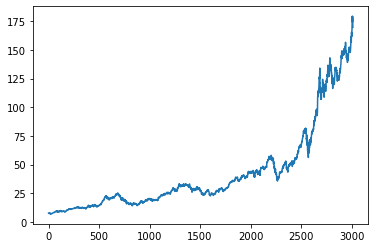

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3009,177.740005,172.210007,175.250000,174.330002,139380400.0
3010,179.500000,172.309998,175.110001,179.300003,131063300.0
3011,181.139999,170.750000,179.279999,172.259995,150185800.0
3012,173.470001,169.690002,169.929993,171.139999,195432700.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3009    151.0882
3010    151.3913
3011    151.6462
3012    151.9078
3013    152.1489
Name: Close, Length: 3014, dtype: float64

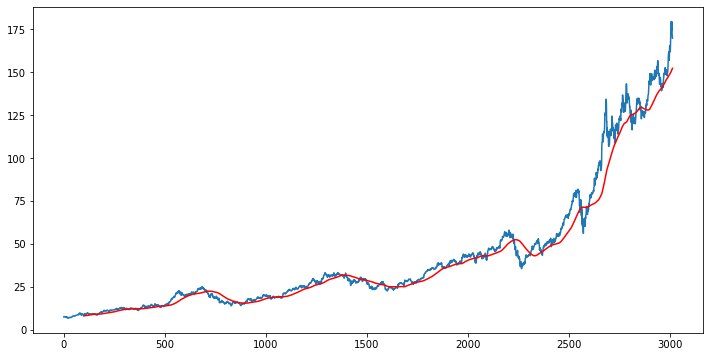

In [9]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3009    140.68740
3010    140.97360
3011    141.23425
3012    141.48285
3013    141.74980
Name: Close, Length: 3014, dtype: float64

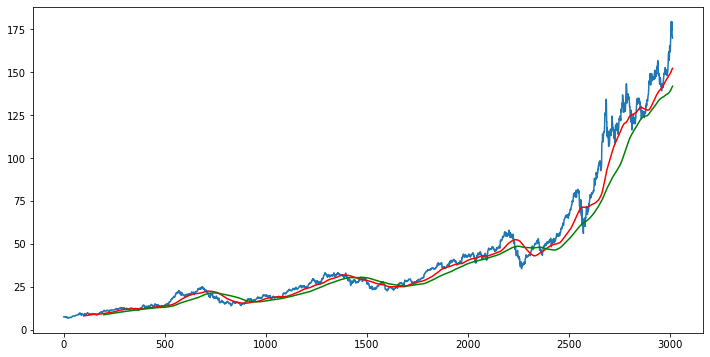

In [11]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(3014, 5)

In [13]:
#splitting data into testing and training

In [14]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2109, 1)
(905, 1)


In [15]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [16]:
data_testing.head()

,Close
2109,46.577499
2110,46.907501
2111,46.790001
2112,47.090000
2113,47.037498


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.97786042],
       [0.98856118],
       [0.98124288]])

In [19]:
data_training_array.shape

(2109, 1)

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train , y_train = np.array(x_train), np.array(y_train)

In [21]:
# ML Model

In [24]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential
# from keras.models import Sequential

In [32]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_5 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_6 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_7 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_9 (LSTM)               (None, 120)              

In [34]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
63/63 [==============================] - 29s 342ms/step - loss: 0.0424
Epoch 2/50
63/63 [==============================] - 21s 336ms/step - loss: 0.0077
Epoch 3/50
63/63 [==============================] - 22s 348ms/step - loss: 0.0077
Epoch 4/50
63/63 [==============================] - 21s 330ms/step - loss: 0.0065
Epoch 5/50
63/63 [==============================] - 19s 294ms/step - loss: 0.0066
Epoch 6/50
63/63 [==============================] - 21s 333ms/step - loss: 0.0062
Epoch 7/50
63/63 [==============================] - 21s 339ms/step - loss: 0.0057
Epoch 8/50
63/63 [==============================] - 22s 350ms/step - loss: 0.0054
Epoch 9/50
63/63 [==============================] - 23s 360ms/step - loss: 0.0050
Epoch 10/50
63/63 [==============================] - 22s 351ms/step - loss: 0.0044
Epoch 11/50
63/63 [==============================] - 21s 340ms/step - loss: 0.0049
Epoch 12/50
63/63 [==============================] - 22s 352ms/step - loss: 0.0051
Epoch 13/50
6

In [35]:
model.save('keras_model.h5')

In [36]:
data_testing.head()

,Close
2109,46.577499
2110,46.907501
2111,46.790001
2112,47.090000
2113,47.037498


In [37]:
past_100_days = data_training.tail(100)

In [38]:
final_df = past_100_days.append(data_testing,ignore_index = True)

In [39]:
final_df.head()

,Close
0,43.752499
1,42.642502
2,42.650002
3,42.770000
4,42.307499


In [41]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05701776],
       [0.04930423],
       [0.04935634],
       ...,
       [0.9500356 ],
       [0.94225258],
       [0.93259327]])

In [42]:
input_data.shape

(1005, 1)

In [43]:
x_test = []
y_test = []

for i in range (100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [44]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(905, 100, 1)
(905,)


In [45]:
#Making Predictions

In [46]:
y_predicted = model.predict(x_test)

In [47]:
y_predicted.shape

(905, 1)

In [48]:
y_test

array([0.07664911, 0.07894235, 0.07812582, 0.08021056, 0.07984572,
       0.08059276, 0.07941139, 0.07871649, 0.07762199, 0.08347667,
       0.08623895, 0.08881013, 0.08997411, 0.08907073, 0.08601309,
       0.08519656, 0.08702072, 0.0842758 , 0.08444954, 0.08104445,
       0.08087074, 0.075572  , 0.0769792 , 0.07517244, 0.07423429,
       0.06945674, 0.073383  , 0.07291396, 0.07524191, 0.07456437,
       0.07816055, 0.072497  , 0.07506818, 0.07953302, 0.08406734,
       0.08366777, 0.07937667, 0.08484911, 0.0853703 , 0.08464065,
       0.08557877, 0.08375461, 0.08632582, 0.08556141, 0.08585674,
       0.08827157, 0.09143345, 0.0903737 , 0.08476224, 0.08290336,
       0.08356351, 0.10303851, 0.11327114, 0.11431352, 0.11618979,
       0.1127847 , 0.11302792, 0.1158597 , 0.11351436, 0.11584231,
       0.11737114, 0.11822242, 0.12357326, 0.1309741 , 0.12729106,
       0.12656137, 0.12657876, 0.12734317, 0.12850715, 0.13159952,
       0.13465714, 0.14035544, 0.14391689, 0.14843384, 0.14970

In [49]:
y_predicted

array([[0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.14254041],
       [0.142

In [50]:
scaler.scale_

array([0.00694915])

In [51]:
scale_factor = 1/0.00694915
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

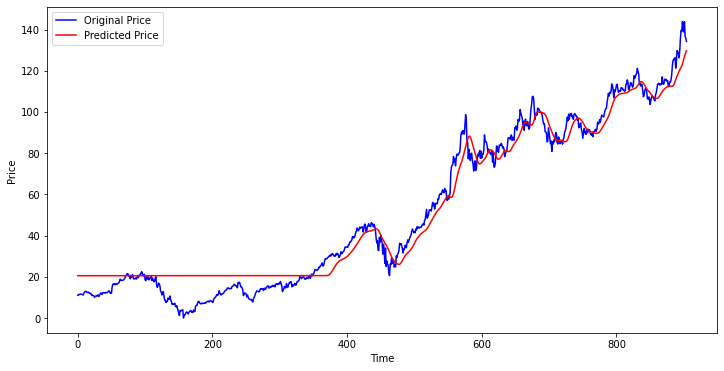

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()